In [30]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

In [10]:
# Read the dataset
df = pd.read_csv("studentclusters.csv")
df_copy = df.copy()

In [11]:
df.head()

,marks,shours
0,72,20.0
1,42,19.0
2,77,7.0
3,93,22.0
4,30,20.0


<Axes: xlabel='marks', ylabel='shours'>

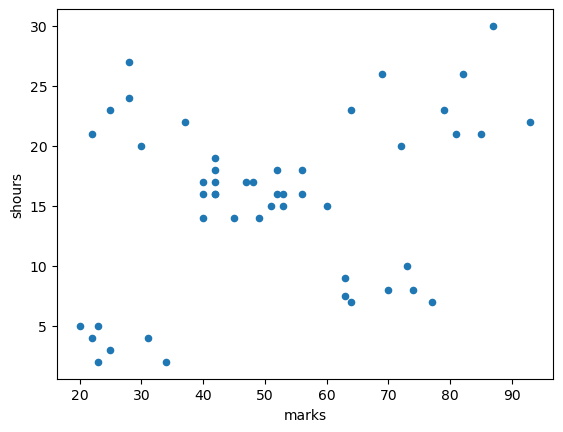

In [12]:
# Visualise the data using Pandas plot function
df_copy.plot.scatter(x='marks', y='shours')

In [13]:
# Normalise the data using standard scaler or min-max
df_copy_scaled = minmax_scale(df_copy)

In [8]:
df_copy_scaled

array([[0.71232877, 0.64285714],
       [0.30136986, 0.60714286],
       [0.78082192, 0.17857143],
       [1.        , 0.71428571],
       [0.1369863 , 0.64285714],
       [0.45205479, 0.46428571],
       [0.73972603, 0.21428571],
       [0.10958904, 0.78571429],
       [0.67123288, 0.85714286],
       [0.60273973, 0.17857143],
       [0.91780822, 1.        ],
       [0.68493151, 0.21428571],
       [0.30136986, 0.57142857],
       [0.80821918, 0.75      ],
       [0.23287671, 0.71428571],
       [0.43835616, 0.5       ],
       [0.42465753, 0.46428571],
       [0.06849315, 0.75      ],
       [0.38356164, 0.53571429],
       [0.89041096, 0.67857143],
       [0.02739726, 0.67857143],
       [0.5890411 , 0.19642857],
       [0.30136986, 0.53571429],
       [0.54794521, 0.46428571],
       [0.49315068, 0.57142857],
       [0.04109589, 0.10714286],
       [0.30136986, 0.5       ],
       [0.2739726 , 0.42857143],
       [0.10958904, 0.89285714],
       [0.36986301, 0.53571429],
       [0.

In [25]:
# Initialise k means
kmeans = KMeans(n_clusters=5, random_state=1234)

In [26]:
# Fit the data to get the clusters
kmeans.fit(df_copy_scaled)

KMeans(n_clusters=5, random_state=1234)

In [28]:
# Visualise the clusters
labels = pd.DataFrame(kmeans.labels_)
df2 = pd.concat([df_copy, labels], axis=1)
df2 = df2.rename(columns={0:'labels'})
df2.head()

,marks,shours,labels
0,72,20.0,3
1,42,19.0,1
2,77,7.0,0
3,93,22.0,3
4,30,20.0,4


<Axes: xlabel='marks', ylabel='shours'>

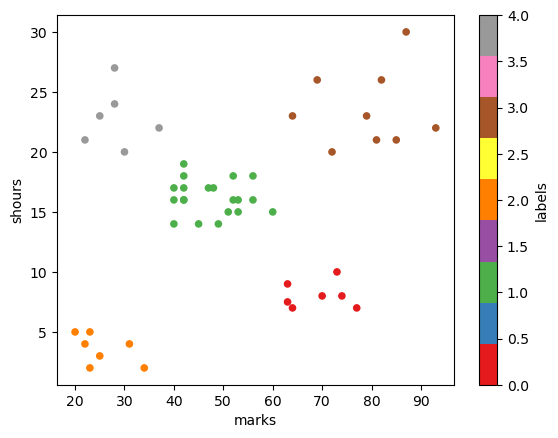

In [29]:
df2.plot.scatter(x='marks', y='shours', c='labels', colormap='Set1')

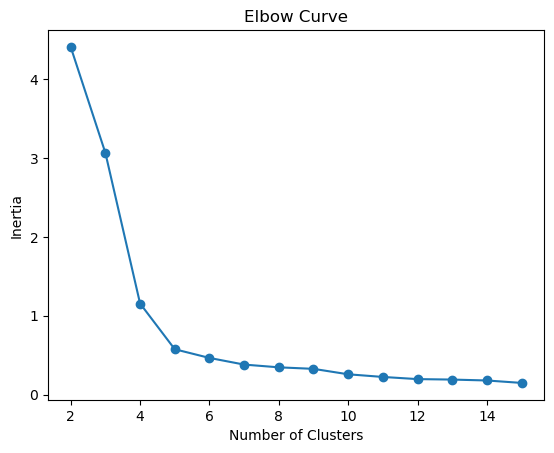

In [33]:
# Elbow method for optimum clusters
inertia = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(df_copy_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 16), inertia, marker='o');
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
plt.show()